<a href="https://colab.research.google.com/github/HVManiSree/Linear-Regression-ML/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

|--- age <= 30.50
|   |--- class: 0
|--- age >  30.50
|   |--- class: 1



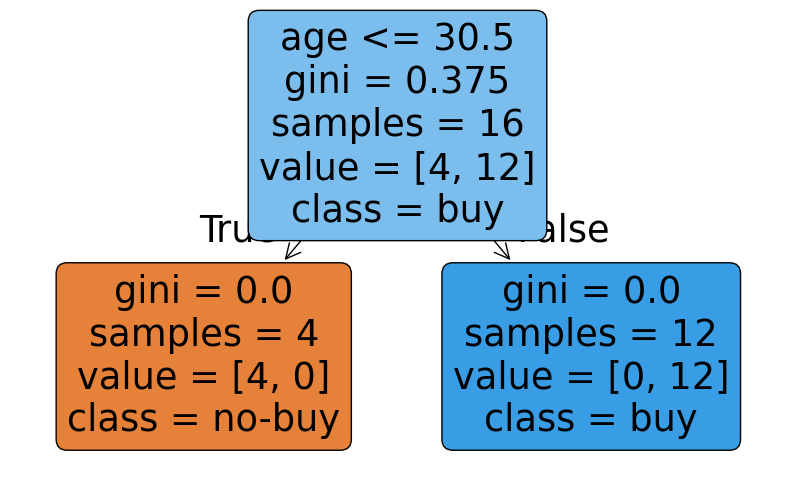

Samples (age,income_k): [[28, 40], [35, 60], [45, 120]]
Predicted buys?        : [0, 1, 1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [5]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt


data = {
    "age":   [25, 32, 47, 51, 62, 23, 43, 52, 48, 33, 29, 40, 36, 50, 28, 45],
    "income_k": [30, 40, 60, 65, 90, 25, 70, 95, 85, 55, 38, 72, 68, 88, 42, 120],
    "buy":   [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]  # 0=no-buy, 1=buy
}
df = pd.DataFrame(data)

X = df[["age", "income_k"]]
y = df["buy"]

# 2. Train Decision Tree

clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
clf.fit(X, y)

# 3. Show text-based tree

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# 4. Plot tree graph

plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=X.columns, class_names=["no-buy","buy"], filled=True, rounded=True)
plt.show()

# 5. Test new samples

samples = np.array([[28,40], [35,60], [45,120]])
predictions = clf.predict(samples)

print("Samples (age,income_k):", samples.tolist())
print("Predicted buys?        :", predictions.tolist())


QUESTION 2


--- Exercise 2: Weather Tree ---

|--- weather <= 0.50
|   |--- class: 0
|--- weather >  0.50
|   |--- class: 1



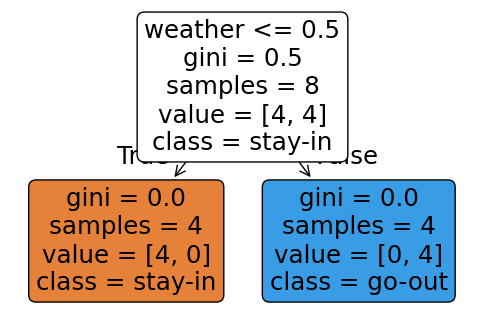

Test weathers (1=sunny,0=rainy): [1, 0]
Predicted activity (0=stay-in,1=go-out): [1, 0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:

# 1. Create dataset
weather_data = {
    "weather": ["sunny","sunny","sunny","rainy","rainy","rainy","sunny","rainy"],
    "activity": ["go-out","go-out","go-out","stay-in","stay-in","stay-in","go-out","stay-in"]
}
df_weather = pd.DataFrame(weather_data)

# Convert categorical data to numbers
df_weather["weather_num"] = df_weather["weather"].map({"sunny":1, "rainy":0})
df_weather["activity_num"] = df_weather["activity"].map({"stay-in":0, "go-out":1})

X_w = df_weather[["weather_num"]]
y_w = df_weather["activity_num"]

# 2. Train Decision Tree
clf_w = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=0)
clf_w.fit(X_w, y_w)

# 3. Text-based tree
print("\n--- Exercise 2: Weather Tree ---\n")
weather_rules = export_text(clf_w, feature_names=["weather"])
print(weather_rules)

# 4. Plot tree
plt.figure(figsize=(6,4))
plot_tree(clf_w, feature_names=["weather"], class_names=["stay-in","go-out"], filled=True, rounded=True)
plt.show()

# 5. Predictions
test_weather = np.array([[1],[0]])  # 1=sunny, 0=rainy
predictions_w = clf_w.predict(test_weather)
print("Test weathers (1=sunny,0=rainy):", test_weather.flatten().tolist())
print("Predicted activity (0=stay-in,1=go-out):", predictions_w.tolist())
